In [25]:
import pandas as pd
import numpy as np
import tqdm

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score,KFold
import warnings

warnings.simplefilter('ignore')

In [26]:
data = pd.read_csv("data.csv")
train_X = data.drop("target", axis=1)

target_encoder = LabelEncoder()
train_Y = target_encoder.fit_transform(data["target"])



In [49]:
def exec_k_fold(num=100):
  train_acc = []
  valid_acc = []
  for i in tqdm.tqdm(range(num)):
    k_fold = KFold(n_splits=10, shuffle=True)
    train_acc_sum = 0
    valid_acc_sum = 0
    for train_i, test_i in k_fold.split(train_X):
      train_x, test_x = train_X.iloc[train_i], train_X.iloc[test_i]
      train_y, test_y = train_Y[train_i], train_Y[test_i]
      mlp_clf = MLPClassifier(hidden_layer_sizes=(3, 50), max_iter=2000).fit(train_x, train_y)
      train_acc_sum += mlp_clf.score(train_x, train_y)
      valid_acc_sum += mlp_clf.score(test_x, test_y)
    train_acc.append(train_acc_sum / 10)
    valid_acc.append(valid_acc_sum / 10)
  
  return train_acc, valid_acc

In [50]:
train_errors, valid_errrors = exec_k_fold()

train_errors

100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


[0.7044444444444444,
 0.7455555555555555,
 0.6844444444444445,
 0.7422222222222222,
 0.7355555555555556,
 0.7466666666666668,
 0.6888888888888889,
 0.7633333333333332,
 0.7399999999999999,
 0.711111111111111,
 0.7066666666666667,
 0.7677777777777777,
 0.7166666666666666,
 0.7255555555555554,
 0.7255555555555555,
 0.7344444444444445,
 0.7344444444444443,
 0.7100000000000001,
 0.6788888888888889,
 0.7044444444444445,
 0.7433333333333334,
 0.7388888888888888,
 0.7122222222222222,
 0.711111111111111,
 0.7166666666666666,
 0.7255555555555555,
 0.708888888888889,
 0.6566666666666667,
 0.7366666666666667,
 0.7244444444444444,
 0.7144444444444444,
 0.7377777777777778,
 0.6777777777777778,
 0.7555555555555555,
 0.6822222222222224,
 0.6755555555555556,
 0.6877777777777778,
 0.7299999999999999,
 0.7244444444444444,
 0.6566666666666667,
 0.7433333333333334,
 0.7144444444444444,
 0.6888888888888889,
 0.7166666666666667,
 0.7211111111111109,
 0.7222222222222223,
 0.74,
 0.79,
 0.73,
 0.6833333333333

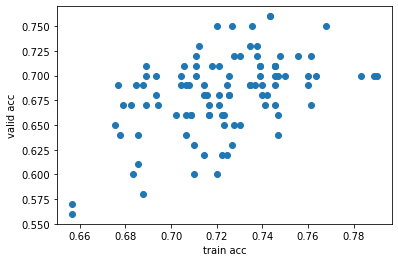

In [51]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel("train acc")
ax.set_ylabel("valid acc")

ax.scatter(train_errors, valid_errrors)
plt.show()